# Mentoria Evolution - Data Analysis

<font color=blue><b> Minerando Dados</b></font><br>
www.minerandodados.com.br

**Importante**: Antes de executar as seguintes células verifique se os arquivos estão no mesmo diretório

**Importe o Pandas**

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import xlrd
import openpyxl

**Ler a base de dados em memória**

In [2]:
dataset = pd.read_csv('kc_house_data.csv', sep=',')

In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Alterando um Dataframe

* Cria uma coluna no dataframe
* Popula uma coluna baseado em um processamento de dados

In [6]:
dataset['size'] = (dataset['bedrooms'] * 20)

**Visualizando a coluna size**

In [8]:
dataset.bedrooms.head(10)

0    3.0
1    3.0
2    2.0
3    4.0
4    3.0
5    4.0
6    3.0
7    3.0
8    3.0
9    3.0
Name: bedrooms, dtype: float64

In [7]:
dataset['size'].head(10)

0    60.0
1    60.0
2    40.0
3    80.0
4    60.0
5    80.0
6    60.0
7    60.0
8    60.0
9    60.0
Name: size, dtype: float64

In [9]:
def categoriza(s):
    if s >= 80:
        return 'Big'
    elif s >= 60:
        return 'Medium'
    elif s >= 40:
        return 'Small'

In [19]:
dataset['cat_size'] = dataset['size'].apply(categoriza)

In [20]:
dataset['cat_size'].head(10)

0    Medium
1    Medium
2     Small
3       Big
4    Medium
5       Big
6    Medium
7    Medium
8    Medium
9    Medium
Name: cat_size, dtype: object

In [21]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,size,cat_size
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,60.0,Medium
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,60.0,Medium
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,40.0,Small
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,80.0,Big
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,60.0,Medium


In [14]:
#Ver a distribuicao da coluna
dataset.cat_size.value_counts()

Medium    9822
Big       8816
Small     2759
Name: cat_size, dtype: int64

# Removendo dados

**Removendo Colunas**

In [22]:
#axis default é igual a 0 e deleta linha
#axis igual a 1, deleta a coluna
dataset.drop(['cat_size'], axis=1, inplace=True)

In [23]:
dataset.drop(['size'], axis=1, inplace=True)

In [24]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Dropa linhas com bedrooms = 0  e maiores que 30**

In [28]:
dataset.drop(dataset[dataset.bedrooms==0].index , inplace=True)

In [29]:
dataset.drop(dataset[dataset.bedrooms>30].index ,inplace=True)

**Visualizando os maiores valores da coluna bedrooms**

In [30]:
dataset.bedrooms.max()

11.0

In [31]:
dataset.bedrooms.min()

1.0

# Missing Values

* Inspeciona o Dataframe em busca de valores missing
* Valores como aspas ou espaço em branco não são considerados nulos ou NA
* O método sum() retorna a soma valores nulos ou faltantes por colunas.

In [32]:
dataset.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Conta a quantidade de valores nulos**

In [7]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Remove todas as linhas onde tenha pela menos um registro faltante em algum atributo.**

In [34]:
dataset.dropna(inplace=True)

**Remove somente linhas que estejam com valores faltantes em todas as colunas, veja:**

In [38]:
dataset.dropna(how='all', inplace=True)

**Preenche com a media dos valores da coluna floors os values null**

In [40]:
dataset['floors'].mean()

1.49433185267444

In [5]:
dataset['floors'].fillna(dataset['floors'].mean(), inplace=True)

**Preenche com 1 os values null da coluna bedrooms**

In [6]:
dataset['bedrooms'].fillna(1, inplace=True)

# Visualização de dados

* O pandas é integrado ao Matplotlib
* Ploting de gráficos de forma fácil
* Ideal para uma rápida visualização

<IPython.core.display.Javascript object>


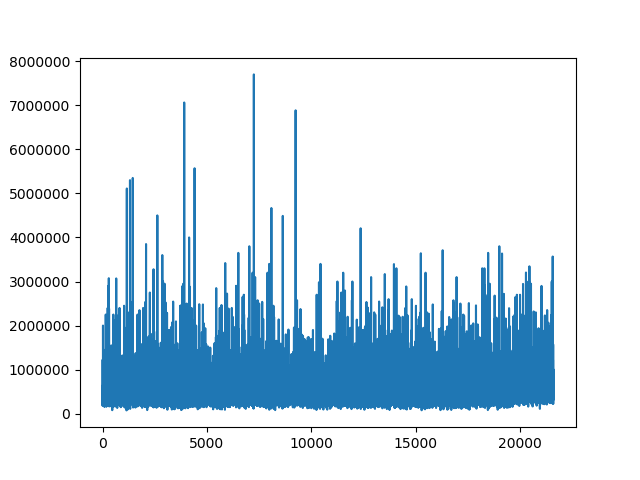

In [8]:
%matplotlib notebook
dataset['price'].plot()

**Plota gráficos do tipo Scatter de duas colunas**

<IPython.core.display.Javascript object>


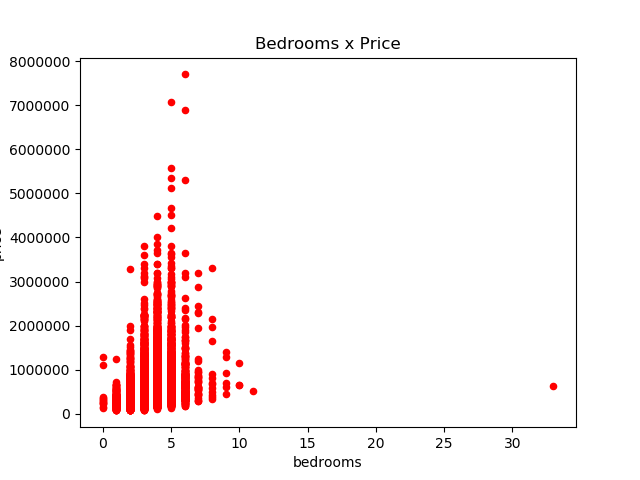

In [9]:
dataset.plot(x='bedrooms',y='price', kind='scatter', title='Bedrooms x Price',color='r')

<IPython.core.display.Javascript object>


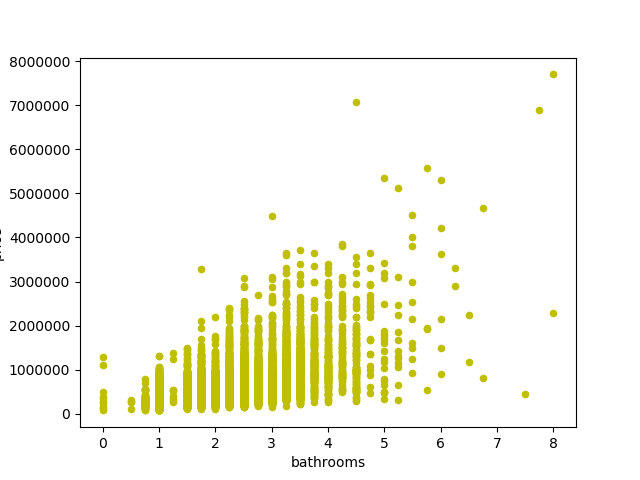

In [10]:
dataset.plot(x='bathrooms',y='price',kind='scatter',color='y')

<IPython.core.display.Javascript object>


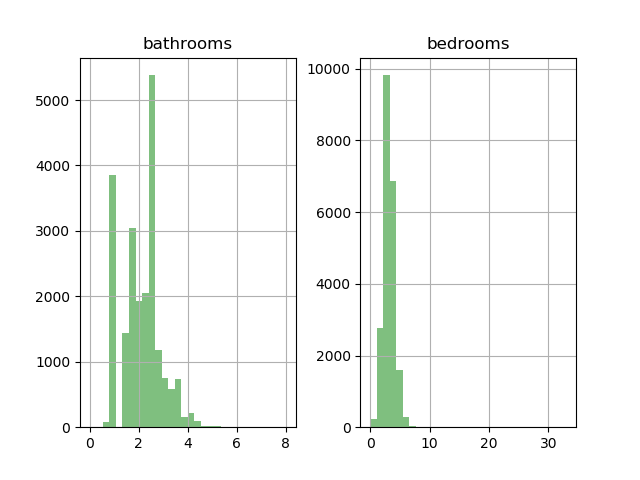

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C54B9C34E0>,
      dtype=object)

In [11]:
%matplotlib notebook
dataset[['bedrooms','bathrooms']].hist(bins=30,alpha=0.5,color='Green')

In [12]:
import matplotlib

<IPython.core.display.Javascript object>


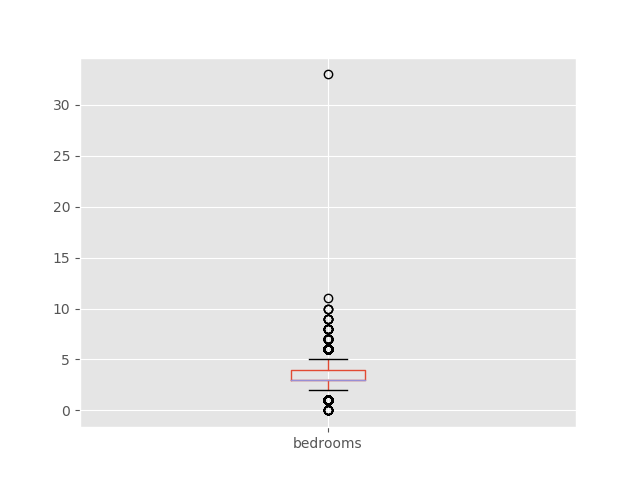

In [13]:
%matplotlib notebook
matplotlib.style.use('ggplot')
dataset.boxplot(column='bedrooms')

<IPython.core.display.Javascript object>


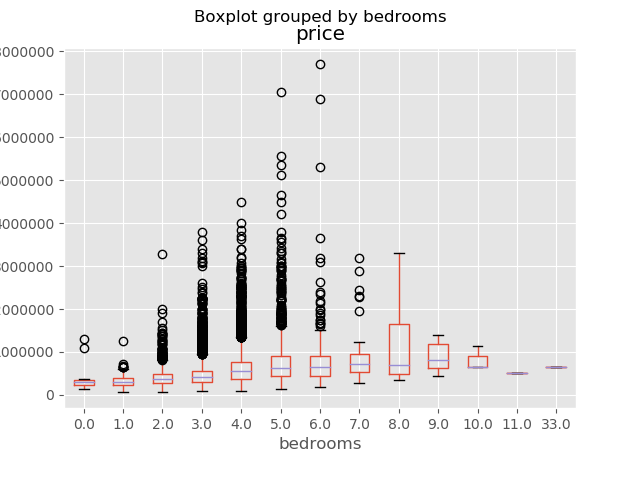

In [14]:
%matplotlib notebook
dataset.boxplot(column='price', by='bedrooms')

## Trabalhando com Excel

**Ler planilha do Excel**

In [4]:
dataframe_excel = pd.read_excel('controle-de-atividades.xlsx', sheet_name=0, header=1)

In [5]:
dataframe_excel.head()

,N°,Atividade,Responsável,Estado Atual,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Elaborar relatório de vendas,Antonio,ENCERRADA,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Encerrar Balanço,Antonio,INICIADA,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Preparar novo Plano de Contas,Pedro,ADIADA,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
4,4.0,Preparar reunião de resultados,Márcia,ENCERRADA,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA


In [6]:
dataframe_excel["Estado Atual"].head(20)

0           NaN
1     ENCERRADA
2      INICIADA
3        ADIADA
4     ENCERRADA
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
Name: Estado Atual, dtype: object

**Odenada planilha por coluna estado atual**

In [7]:
dataframe_excel.sort_values(by="Estado Atual").head(10)

,N°,Atividade,Responsável,Estado Atual,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
3,3.0,Preparar novo Plano de Contas,Pedro,ADIADA,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
1,1.0,Elaborar relatório de vendas,Antonio,ENCERRADA,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Preparar reunião de resultados,Márcia,ENCERRADA,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA
2,2.0,Encerrar Balanço,Antonio,INICIADA,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUSPENSA
6,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENCERRADA
7,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIANTADA
9,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EM DIA


**Chega dados nulos**

In [8]:
dataframe_excel.isnull().sum()

N°               48
Atividade        48
Responsável      48
Estado Atual     48
Início           48
Previsão         48
Término          50
Duração Prev.    48
Duração Real     50
SITUAÇÃO         48
Unnamed: 10      52
Unnamed: 11      52
Unnamed: 12      52
Unnamed: 13      52
Unnamed: 14      52
Unnamed: 15      52
Unnamed: 16      52
Unnamed: 17      52
Unnamed: 18      52
Unnamed: 19      45
dtype: int64

**Dropa linhas nulas em todas as colunas**

In [9]:
dataframe_excel.dropna(how='all', inplace=True)

In [10]:
dataframe_excel

,N°,Atividade,Responsável,Estado Atual,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
1,1.0,Elaborar relatório de vendas,Antonio,ENCERRADA,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Encerrar Balanço,Antonio,INICIADA,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Preparar novo Plano de Contas,Pedro,ADIADA,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
4,4.0,Preparar reunião de resultados,Márcia,ENCERRADA,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA
5,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUSPENSA
6,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENCERRADA
8,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIANTADA
9,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EM DIA
10,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATRASADA


In [11]:
dataframe_excel.to_excel('planilha_teste.xlsx', index=False)

* Pratique o que foi aprendido refazendo todos os passos
* Faça os exercícios e me envie no e-mail abaixo.
* **Dúvidas?** Mande um e-mail para mim em contato@minerandodados.com.br